In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [24]:
from google.colab import files
uploaded = files.upload()

Saving iris.data.csv to iris.data.csv


In [27]:
# Preprocessing Input data
data = pd.read_csv('iris.data.csv',names=["sepal.length","sepal.width","petal.length","petal.width","variety"])

In [28]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [31]:
data.variety.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: variety, dtype: int64

In [32]:
data.shape

(150, 5)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


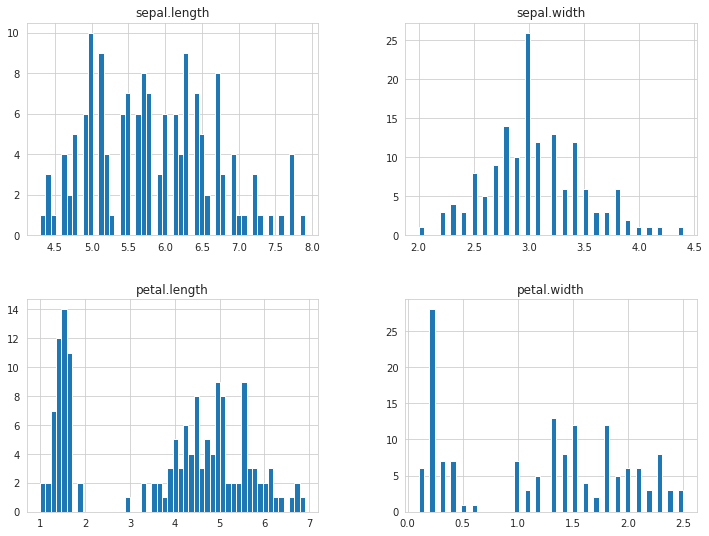

In [34]:
data.hist(bins=50,figsize=(12,9))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8d1d24790>,
      dtype=object)

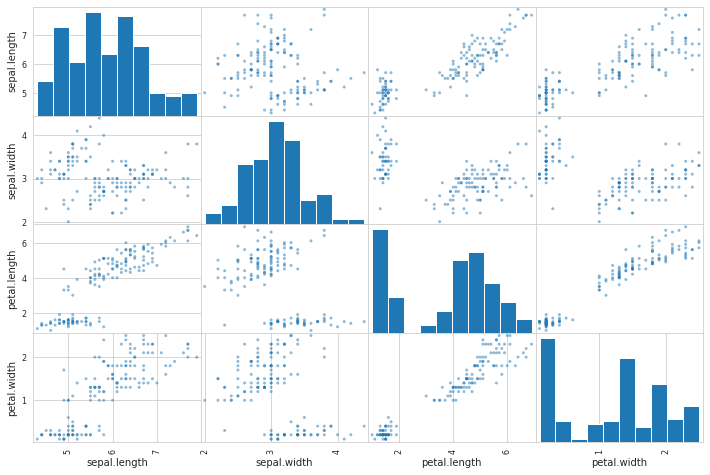

In [35]:
from pandas.plotting import scatter_matrix
attributes=["sepal.length","sepal.width","petal.length","petal.width"]
scatter_matrix(data[attributes],figsize=(12,8))

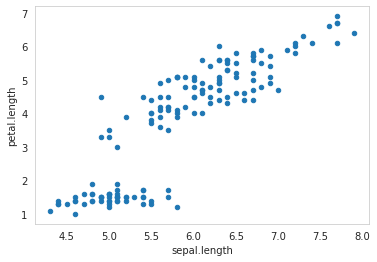

In [36]:
data.plot(kind ="scatter",
          x ='sepal.length',
          y ='petal.length')
plt.grid()

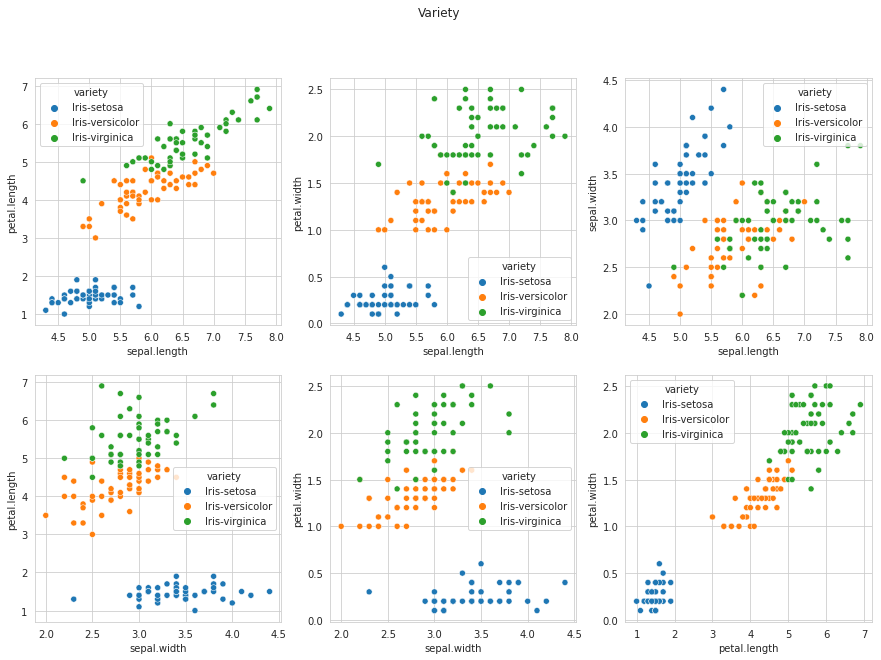

In [37]:
fig,axes=plt.subplots(2,3,figsize=(15,10))
fig.suptitle("Variety")
sns.set_style("whitegrid")
sns.scatterplot(data=data,ax=axes[0,0],hue ="variety",x='sepal.length',y='petal.length')
sns.scatterplot(data=data,ax=axes[0,1],hue ="variety",x='sepal.length',y='petal.width')
sns.scatterplot(data=data,ax=axes[0,2],hue ="variety",x='sepal.length',y='sepal.width')
sns.scatterplot(data=data,ax=axes[1,0],hue ="variety",x='sepal.width',y='petal.length')
sns.scatterplot(data=data,ax=axes[1,1],hue ="variety",x='sepal.width',y='petal.width')
sns.scatterplot(data=data,ax=axes[1,2],hue ="variety",x='petal.length',y='petal.width')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [44]:
y_pred = classifier.predict(X_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error 
from math import sqrt
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 7  0  0]
 [ 0 12  1]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [46]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
   
    pred_i = knn.predict(X_test) 
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

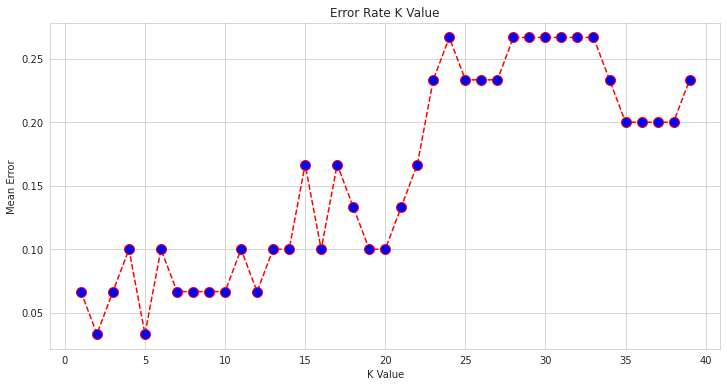

In [48]:
#  Plot the error against k value

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10) 
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error') 

In [61]:
index_list_max=[]
max_error=max(error)
print(max_error)
for i in range(len(error)):
  if error[i]==max_error:
    index_list_max.append(i)
print(index_list_max)

0.26666666666666666
[23, 27, 28, 29, 30, 31, 32]


In [62]:
index_list_min=[]
min_error=min(error)
print(min_error)
for i in range(len(error)):
  if error[i]==min_error:
    index_list_min.append(i)
print(index_list_min)

0.03333333333333333
[1, 4]


In [64]:
print('Value of optimum k=',index_list_min[1]+1)

Value of optimum k= 5
